In [1]:
from inputs import read_phenotypes

TCRs = read_phenotypes("config/real_sample_TCRs.txt")
peptides = read_phenotypes("config/real_sample_peptides.txt")

In [2]:
from phenotype import SequencePhenotypeStructure, Phenotype, SequencePhenotypeInteractionData

TCR_struct = SequencePhenotypeStructure(TCRs)
peptide_struct = SequencePhenotypeStructure(peptides)

def get_distances(struct : SequencePhenotypeStructure):
    dists = []
    d = SequencePhenotypeInteractionData(0, 0)
    for id in struct.ids:
        phen = Phenotype(struct, id)
        for id_ in struct.ids:
            phen_ = Phenotype(struct, id_)
            cur_dist = SequencePhenotypeStructure.get_sequence_distance(phen, phen_, d)
            dists.append(cur_dist)
    return dists

def get_distances_from_sequences(sequences):
    struct = SequencePhenotypeStructure(sequences)
    return get_distances(struct)


(array([ 21.,   2.,   6.,   8.,  12.,  98.,  92., 114.,  46.,  42.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

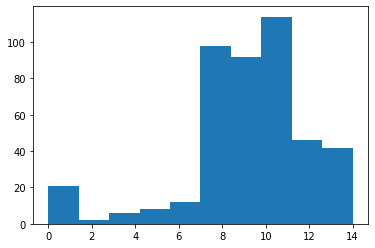

In [3]:
import matplotlib.pyplot as plt
TCR_dists = get_distances(TCR_struct)
plt.hist(TCR_dists)

(array([12.,  0.,  0.,  0.,  0.,  0.,  6., 34., 50., 42.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

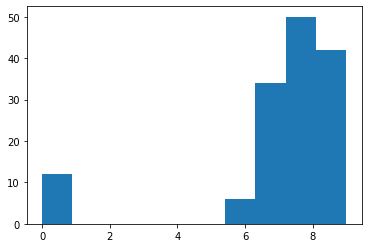

In [4]:
peptide_dists = get_distances(peptide_struct)
plt.hist(peptide_dists)

In [5]:
import numpy as np

peptide_avg = sum(peptide_dists)/len(peptide_dists)
norm_peptide_dists = np.array(peptide_dists) / peptide_avg

In [6]:
TCR_avg = sum(TCR_dists)/len(TCR_dists)
norm_TCR_dists = np.array(TCR_dists)/(TCR_avg)

Normalise i.e. place the mean value at 1.

(array([12.,  0.,  0.,  0.,  0.,  0.,  6., 34., 50., 42.]),
 array([0.        , 0.12319392, 0.24638783, 0.36958175, 0.49277567,
        0.61596958, 0.7391635 , 0.86235741, 0.98555133, 1.10874525,
        1.23193916]),
 <BarContainer object of 10 artists>)

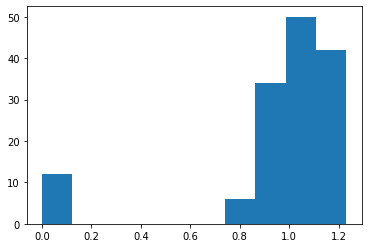

In [7]:
plt.hist(norm_peptide_dists)

(array([ 21.,   2.,   6.,   8.,  12.,  98.,  92., 114.,  46.,  42.]),
 array([0.      , 0.153125, 0.30625 , 0.459375, 0.6125  , 0.765625,
        0.91875 , 1.071875, 1.225   , 1.378125, 1.53125 ]),
 <BarContainer object of 10 artists>)

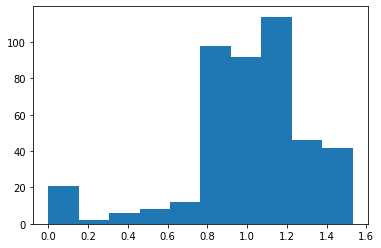

In [8]:
plt.hist(norm_TCR_dists)

In [9]:
more_TCRs = read_phenotypes("config/TCRs_from_TULIP.txt")
more_peptides = read_phenotypes("config/peptides_from_TULIP.txt")

In [10]:
more_TCRs_dists = get_distances_from_sequences(more_TCRs)

(array([  1182.,   5382.,  11874.,  78014.,  83748., 209358., 119610.,
         19876.,   9084.,    628.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

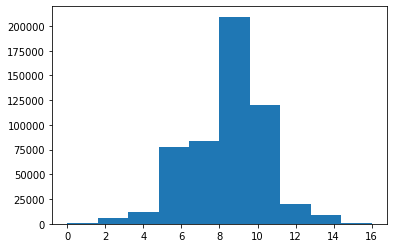

In [11]:
plt.hist(more_TCRs_dists)

(array([1.480e+02, 4.000e+00, 1.600e+01, 4.000e+00, 3.000e+01, 2.100e+02,
        1.336e+03, 5.176e+03, 8.852e+03, 6.128e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

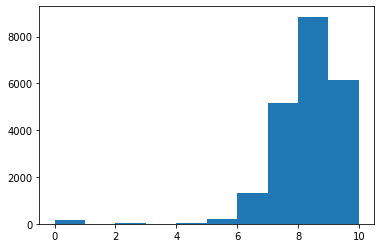

In [12]:
plt.hist(get_distances_from_sequences(more_peptides))

Now let's look at the scaling for different parameters

In [15]:
def get_scalings(struct : SequencePhenotypeStructure, rho, rho_tilde):
    dists = []
    d = SequencePhenotypeInteractionData(0, rho_tilde)
    for id in struct.ids:
        phen = Phenotype(struct, id)
        for id_ in struct.ids:
            phen_ = Phenotype(struct, id_)
            cur_dist = SequencePhenotypeStructure.get_sequence_scaling(phen, phen_,d, rho)
            dists.append(cur_dist)
    return dists


(array([140., 154.,  98.,  12.,  14.,   0.,   0.,   2.,   0.,  21.]),
 array([0.03950617, 0.04555556, 0.05160494, 0.05765432, 0.0637037 ,
        0.06975309, 0.07580247, 0.08185185, 0.08790123, 0.09395062,
        0.1       ]),
 <BarContainer object of 10 artists>)

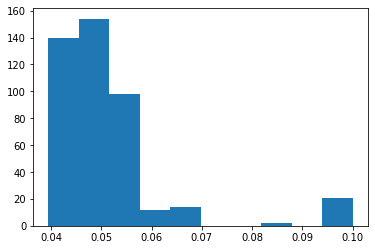

In [18]:
TCR_scalings = get_scalings(TCR_struct, rho=1, rho_tilde=0.1)
plt.hist(TCR_scalings)

(array([92., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0.04480409, 0.05032368, 0.05584327, 0.06136286, 0.06688245,
        0.07240204, 0.07792164, 0.08344123, 0.08896082, 0.09448041,
        0.1       ]),
 <BarContainer object of 10 artists>)

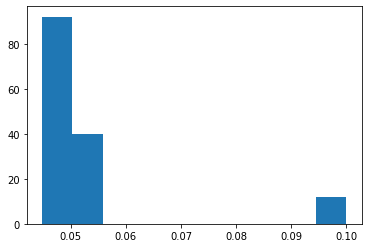

In [19]:
peptide_scalings = get_scalings(peptide_struct, rho=1, rho_tilde=0.1)
plt.hist(peptide_scalings)

We want to be happy with essentially (because this is closest to what we've done before): $\rho = 1$, $\tilde{\rho} = 0.1$

In [20]:
more_TCR_struct = SequencePhenotypeStructure(more_TCRs)
more_peptide_struct = SequencePhenotypeStructure(more_peptides)

(array([  9712., 139486., 209358., 135488.,  26274.,  15880.,      0.,
          1376.,    448.,    734.]),
 array([0.0341721 , 0.04075489, 0.04733768, 0.05392047, 0.06050326,
        0.06708605, 0.07366884, 0.08025163, 0.08683442, 0.09341721,
        0.1       ]),
 <BarContainer object of 10 artists>)

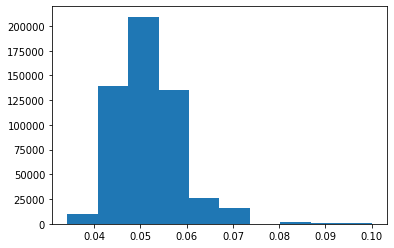

In [21]:
more_TCR_scalings = get_scalings(more_TCR_struct, rho=1, rho_tilde=0.1)
plt.hist(more_TCR_scalings)

(array([1.498e+04, 5.176e+03, 1.336e+03, 2.400e+02, 0.000e+00, 4.000e+00,
        1.600e+01, 4.000e+00, 0.000e+00, 1.480e+02]),
 array([0.04394685, 0.04955217, 0.05515748, 0.0607628 , 0.06636811,
        0.07197343, 0.07757874, 0.08318406, 0.08878937, 0.09439469,
        0.1       ]),
 <BarContainer object of 10 artists>)

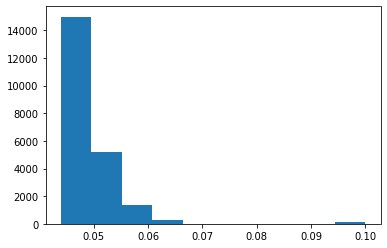

In [22]:
more_peptide_scalings = get_scalings(more_peptide_struct, rho=1, rho_tilde=0.1)
plt.hist(more_peptide_scalings)